In [57]:
import os
# os.getcwd()
os.chdir('/Users/calgergen/Desktop/Homework/HW 1 Fall 2019/')

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
ourdata = os.listdir()

csvdata = []

for f in ourdata:
    if ".csv" in f:
        csvdata.append(f)

In [60]:
print(csvdata)

['Medicare Hospital Spending by Claim 2017.csv', 'Medicare Hospital Spending by Claim 2016.csv', 'Hospital General Information 2016.csv', 'Hospital General Information 2017.csv']


In [61]:
Hosp2016 = pd.read_csv(csvdata[2], sep = ',', encoding = 'latin-1')
Med_Hosp2016 = pd.read_csv(csvdata[1], sep = ',', encoding = 'latin-1')
Hosp2017 = pd.read_csv(csvdata[3], sep = ',', encoding = 'latin-1')
Med_Hosp2017 = pd.read_csv(csvdata[0], sep = ',', encoding = 'latin-1')
print("All are dataframes: ", type(Hosp2016), type(Med_Hosp2016), type(Hosp2017), type(Med_Hosp2017))
print("Shape of Hospital Data 2016: ", Hosp2016.shape, "Shape of Medical Data 2016: ", Med_Hosp2016.shape,
     "Shape of Hospital Data 2017: ", Hosp2017.shape, "Shape of Medical Data 2017: ", Med_Hosp2017.shape)

All are dataframes:  <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
Shape of Hospital Data 2016:  (4797, 28) Shape of Medical Data 2016:  (69256, 13) Shape of Hospital Data 2017:  (5334, 28) Shape of Medical Data 2017:  (68882, 13)


In [62]:
dontkeepH16 = [2, 7, 13, 15, 17, 19, 21, 23, 25, 27]
Hosp2016 = Hosp2016.drop(Hosp2016.columns[[dontkeepH16]], axis = 1)
print("2016 Hospital Data: ", Hosp2016.columns)
Hosp2016.columns = [str(col) + '_2016' for col in Hosp2016.columns]
print("New Column Names: ", Hosp2016.columns)

dontkeepMH16 = [8, 9, 10, 11, 12]
Med_Hosp2016 = Med_Hosp2016.drop(Med_Hosp2016.columns[[dontkeepMH16]], axis = 1)
print("2016 Spending Data: ", Med_Hosp2016.columns)
Med_Hosp2016.columns = [str(col) + '_2016' for col in Med_Hosp2016.columns]
print("New Column Names: ", Med_Hosp2016.columns)

dontkeepH17 = [2, 7, 13, 15, 17, 19, 21, 23, 25, 27]
Hosp2017 = Hosp2017.drop(Hosp2017.columns[[dontkeepH17]], axis = 1)
print("2017 Hospital Data: ", Hosp2017.columns)
Hosp2017.columns = [str(col) + '_2017' for col in Hosp2017.columns]
print("New Column Names: ", Hosp2017.columns)

dontkeepMH17 = [8, 9, 10, 11, 12]
Med_Hosp2017 = Med_Hosp2017.drop(Med_Hosp2017.columns[[dontkeepMH17]], axis = 1)
print("2017 Spending Data: ", Med_Hosp2017.columns)
Med_Hosp2017.columns = [str(col) + '_2017' for col in Med_Hosp2017.columns]
print("New Column Names: ", Med_Hosp2017.columns)

2016 Hospital Data:  Index(['Provider ID', 'Hospital Name', 'City', 'State', 'ZIP Code',
       'County Name', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Mortality national comparison',
       'Safety of care national comparison', 'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison'],
      dtype='object')
New Column Names:  Index(['Provider ID_2016', 'Hospital Name_2016', 'City_2016', 'State_2016',
       'ZIP Code_2016', 'County Name_2016', 'Hospital Type_2016',
       'Hospital Ownership_2016', 'Emergency Services_2016',
       'Meets criteria for meaningful use of EHRs_2016',
       'Hospital overall rating_2016', 'Mortality national comparison_2016',
       'Safety of care national compa

In [63]:
HospAll = pd.merge(Hosp2016, Hosp2017, how = "outer", left_on = "Provider ID_2016", right_on = "Provider ID_2017")

In [64]:
HospAll.fillna("Empty", inplace = True)
HospAll['Present'] = np.where( (HospAll['Provider ID_2016'] == "Empty") |
                               (HospAll['Provider ID_2017'] == "Empty"), 'No', 'Yes' )

print(HospAll['Present'].values)
HospAll.shape

['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']


(5393, 37)

In [65]:
HospAllPresent = HospAll[HospAll['Present'] == 'Yes']
HospAllPresent.shape

(4738, 37)

In [66]:
SpendAll = pd.merge(Med_Hosp2016, Med_Hosp2017, how = "outer", 
                    left_on = "Provider_ID_2016", right_on = "PROVIDER_ID_2017")
SpendAll.shape

(1505218, 16)

In [67]:
SpendAllTot = SpendAll[SpendAll['Claim_Type_2016'] == 'Total']
SpendAllTotal = SpendAllTot[SpendAllTot['CLAIM_TYPE_2017'] == 'Total']
SpendAllTotal.shape

(3107, 16)

In [68]:
finaldata = pd.merge(HospAllPresent, SpendAllTotal, how = "inner",
                     left_on = "Provider ID_2016", right_on = "Provider_ID_2016")

In [69]:
print(finaldata.shape)
print(finaldata.columns)
finaldata

finaldata['Hospital overall rating_2016'].values

(3083, 53)
Index(['Provider ID_2016', 'Hospital Name_2016', 'City_2016', 'State_2016_x',
       'ZIP Code_2016', 'County Name_2016', 'Hospital Type_2016',
       'Hospital Ownership_2016', 'Emergency Services_2016',
       'Meets criteria for meaningful use of EHRs_2016',
       'Hospital overall rating_2016', 'Mortality national comparison_2016',
       'Safety of care national comparison_2016',
       'Readmission national comparison_2016',
       'Patient experience national comparison_2016',
       'Effectiveness of care national comparison_2016',
       'Timeliness of care national comparison_2016',
       'Efficient use of medical imaging national comparison_2016',
       'Provider ID_2017', 'Hospital Name_2017', 'City_2017', 'State_2017',
       'ZIP Code_2017', 'County Name_2017', 'Hospital Type_2017',
       'Hospital Ownership_2017', 'Emergency Services_2017',
       'Meets criteria for meaningful use of EHRs_2017',
       'Hospital overall rating_2017', 'Mortality national c

array(['3', '2', '2', ..., '4', 'Not Available', 'Not Available'],
      dtype=object)

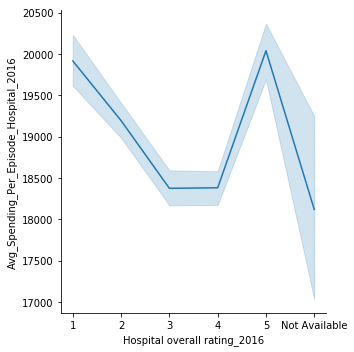

In [70]:
ax = sns.relplot(x =  'Hospital overall rating_2016', y= 'Avg_Spending_Per_Episode_Hospital_2016', 
                 data = finaldata, kind = "line")

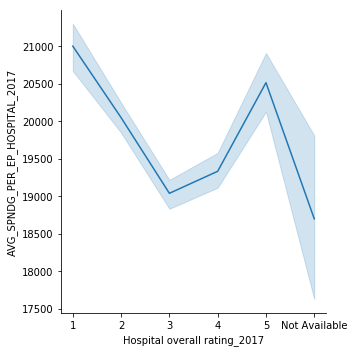

In [71]:
ax = sns.relplot(x =  'Hospital overall rating_2017', y= 'AVG_SPNDG_PER_EP_HOSPITAL_2017', 
                 data = finaldata, kind = "line")

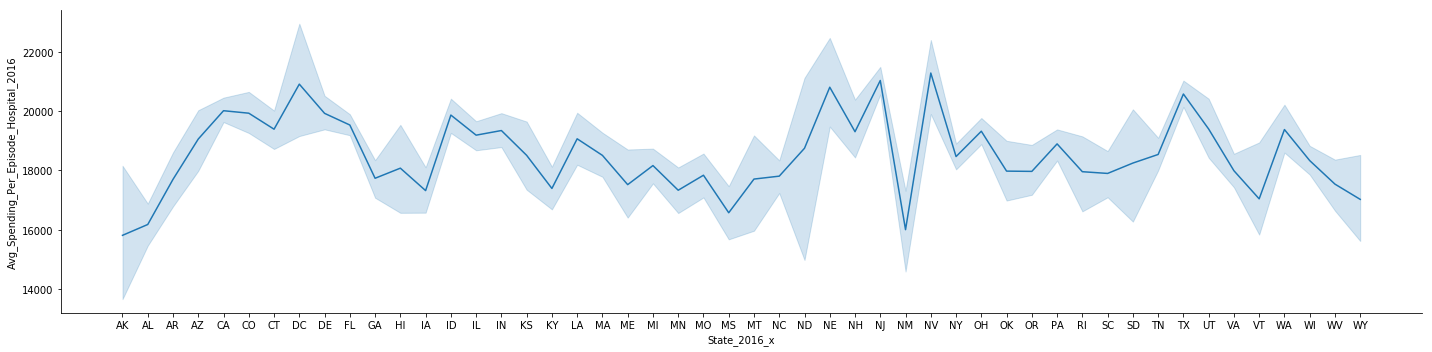

In [72]:
ax = sns.relplot(x =  'State_2016_x', y= 'Avg_Spending_Per_Episode_Hospital_2016', 
                 data = finaldata, kind = "line", height = 5, aspect = 4)

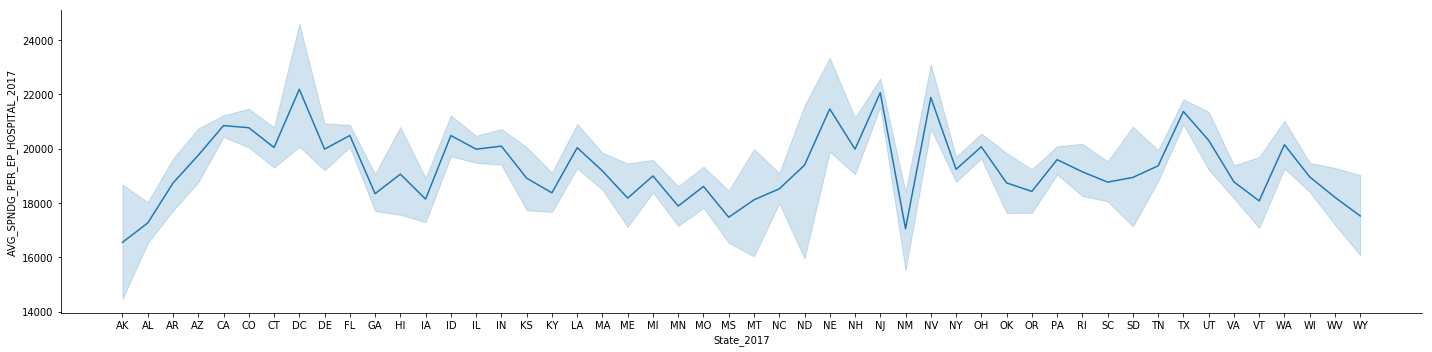

In [73]:
ax = sns.relplot(x =  'State_2017', y= 'AVG_SPNDG_PER_EP_HOSPITAL_2017', 
                 data = finaldata, kind = "line", height = 5, aspect = 4)

In [74]:
unique_hospitals = finaldata.groupby('State_2016_x')['Provider ID_2016'].nunique()

print(unique_hospitals.sort_values(ascending = False))

print("CA %: ", 286/sum(unique_hospitals))
print("TX %: ", 274/sum(unique_hospitals))
print("FL %: ", 165/sum(unique_hospitals))
print("PA %: ", 144/sum(unique_hospitals))
print("NY %: ", 140/sum(unique_hospitals))

State_2016_x
CA    286
TX    274
FL    165
PA    144
NY    140
IL    124
OH    121
GA     99
MI     93
IN     85
TN     84
NC     82
AL     81
LA     81
OK     76
VA     72
MO     71
NJ     64
KY     63
WI     63
AZ     57
MS     57
MA     55
SC     53
KS     50
MN     47
WA     46
AR     44
CO     44
IA     34
OR     34
UT     30
WV     29
NM     28
CT     28
NE     23
NV     19
ME     17
SD     16
MT     13
NH     13
ID     13
HI     12
RI     10
WY      9
AK      8
DC      7
ND      7
DE      6
VT      6
Name: Provider ID_2016, dtype: int64
CA %:  0.09276678559844308
TX %:  0.08887447291599092
FL %:  0.05351929938371716
PA %:  0.04670775218942588
NY %:  0.0454103146286085


In [75]:
finaldata['starna'] = (finaldata[['Hospital overall rating_2016', 'Hospital overall rating_2017']] 
                        == 'Not Available').sum(axis=1)

finaldata['sixteenna'] = ( ( finaldata[['Mortality national comparison_2016',
       'Safety of care national comparison_2016',
       'Readmission national comparison_2016',
       'Patient experience national comparison_2016',
       'Effectiveness of care national comparison_2016',
       'Timeliness of care national comparison_2016',
       'Efficient use of medical imaging national comparison_2016']] 
                        == 'Not Available') | 
                       ( finaldata[['Mortality national comparison_2016',
       'Safety of care national comparison_2016',
       'Readmission national comparison_2016',
       'Patient experience national comparison_2016',
       'Effectiveness of care national comparison_2016',
       'Timeliness of care national comparison_2016',
       'Efficient use of medical imaging national comparison_2016']] 
                        == 'Results are not available for this reporting period') 
                       ).sum(axis=1)

finaldata['seventeenna'] = ( ( finaldata[['Mortality national comparison_2017',
       'Safety of care national comparison_2017',
       'Readmission national comparison_2017',
       'Patient experience national comparison_2017',
       'Effectiveness of care national comparison_2017',
       'Timeliness of care national comparison_2017',
       'Efficient use of medical imaging national comparison_2017']] 
                        == 'Not Available') | 
                       ( finaldata[['Mortality national comparison_2017',
       'Safety of care national comparison_2017',
       'Readmission national comparison_2017',
       'Patient experience national comparison_2017',
       'Effectiveness of care national comparison_2017',
       'Timeliness of care national comparison_2017',
       'Efficient use of medical imaging national comparison_2017']] 
                        == 'Results are not available for this reporting period') 
                       ).sum(axis=1)

print(finaldata['starna'])
print(finaldata['sixteenna'])
print(finaldata['seventeenna'])

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
3053    0
3054    0
3055    0
3056    2
3057    0
3058    0
3059    1
3060    0
3061    0
3062    2
3063    2
3064    0
3065    0
3066    0
3067    0
3068    0
3069    0
3070    0
3071    0
3072    0
3073    0
3074    0
3075    0
3076    2
3077    0
3078    0
3079    0
3080    0
3081    2
3082    2
Name: starna, Length: 3083, dtype: int64
0       0
1       0
2       0
3       2
4       4
5       0
6       0
7       0
8       0
9       0
10      2
11      0
12      0
13      0
14      3
15      0
16      2
17      0
18      0
19      0
20      0
21      0
22      1
23      1
24      1
25      3
26      0
27      3
28      2
29      0
       ..
3053    0
3054    3
3055    0
3056    5

In [81]:
print(pd.crosstab(finaldata.starna, finaldata.sixteenna, 
                  finaldata.seventeenna, margins = True, aggfunc = 'count'))

pd.crosstab(finaldata.starna, finaldata.seventeenna, finaldata.sixteenna, margins = True, aggfunc = 'count')

sixteenna       0      1      2     3      4     5     6     7   All
starna                                                              
0          2256.0  345.0  161.0  87.0   71.0   NaN   NaN   NaN  2920
1             NaN    NaN    1.0   4.0   13.0  10.0   NaN   1.0    29
2             NaN    NaN    NaN   NaN   18.0  42.0  45.0  29.0   134
All        2256.0  345.0  162.0  91.0  102.0  52.0  45.0  30.0  3083


seventeenna,0,1,2,3,4,5,6,7,All
starna,,,,,,,,,
0,2305.0,311.0,135.0,94.0,75.0,NaN,NaN,NaN,2920
1,1.0,3.0,NaN,7.0,7.0,10.0,NaN,1.0,29
2,NaN,NaN,NaN,1.0,20.0,41.0,45.0,27.0,134
All,2306.0,314.0,135.0,102.0,102.0,51.0,45.0,28.0,3083


In [83]:
finaldata['episode_national_six'] = finaldata['Avg_Spending_Per_Episode_Hospital_2016'] / finaldata['Avg_Spending_Per_Episode_Nation_2016']
finaldata['episode_national_seven'] = finaldata['AVG_SPNDG_PER_EP_HOSPITAL_2017'] / finaldata['AVG_SPNDG_PER_EP_NATIONAL_2017']
finaldata.columns

Index(['Provider ID_2016', 'Hospital Name_2016', 'City_2016', 'State_2016_x',
       'ZIP Code_2016', 'County Name_2016', 'Hospital Type_2016',
       'Hospital Ownership_2016', 'Emergency Services_2016',
       'Meets criteria for meaningful use of EHRs_2016',
       'Hospital overall rating_2016', 'Mortality national comparison_2016',
       'Safety of care national comparison_2016',
       'Readmission national comparison_2016',
       'Patient experience national comparison_2016',
       'Effectiveness of care national comparison_2016',
       'Timeliness of care national comparison_2016',
       'Efficient use of medical imaging national comparison_2016',
       'Provider ID_2017', 'Hospital Name_2017', 'City_2017', 'State_2017',
       'ZIP Code_2017', 'County Name_2017', 'Hospital Type_2017',
       'Hospital Ownership_2017', 'Emergency Services_2017',
       'Meets criteria for meaningful use of EHRs_2017',
       'Hospital overall rating_2017', 'Mortality national comparison_2

In [85]:
ratio2016 = finaldata.groupby('Hospital Name_2016')['episode_national_six'].nunique()

print(ratio2016.sort_values(ascending = False))

ratio2017 = finaldata.groupby('HOSPITAL_NAME_2017')['episode_national_seven'].nunique()

print(ratio2017.sort_values(ascending = False))

Hospital Name_2016
MEMORIAL HOSPITAL                          9
ST JOSEPH HOSPITAL                         6
ST JOSEPH MEDICAL CENTER                   6
GOOD SAMARITAN HOSPITAL                    6
MERCY HOSPITAL                             4
MERCY MEDICAL CENTER                       4
ST MARY MEDICAL CENTER                     4
ST FRANCIS HOSPITAL                        4
ST MARY'S MEDICAL CENTER                   4
MARION GENERAL HOSPITAL                    3
METHODIST HOSPITAL                         3
MEMORIAL MEDICAL CENTER                    3
SAINT FRANCIS MEDICAL CENTER               3
WAYNE MEMORIAL HOSPITAL                    3
MERCY REGIONAL MEDICAL CENTER              3
GOOD SAMARITAN MEDICAL CENTER              3
SACRED HEART HOSPITAL                      3
ST JOSEPHS HOSPITAL                        3
COVENANT MEDICAL CENTER                    3
DOCTORS HOSPITAL                           3
NORTHWEST MEDICAL CENTER                   3
ST LUKES HOSPITAL                   

In [86]:
finaldata['episode_national_six_diff'] = finaldata['Avg_Spending_Per_Episode_Hospital_2016'] - finaldata['Avg_Spending_Per_Episode_Nation_2016']
finaldata['episode_national_seven_diff'] = finaldata['AVG_SPNDG_PER_EP_HOSPITAL_2017'] - finaldata['AVG_SPNDG_PER_EP_NATIONAL_2017']
finaldata.columns

Index(['Provider ID_2016', 'Hospital Name_2016', 'City_2016', 'State_2016_x',
       'ZIP Code_2016', 'County Name_2016', 'Hospital Type_2016',
       'Hospital Ownership_2016', 'Emergency Services_2016',
       'Meets criteria for meaningful use of EHRs_2016',
       'Hospital overall rating_2016', 'Mortality national comparison_2016',
       'Safety of care national comparison_2016',
       'Readmission national comparison_2016',
       'Patient experience national comparison_2016',
       'Effectiveness of care national comparison_2016',
       'Timeliness of care national comparison_2016',
       'Efficient use of medical imaging national comparison_2016',
       'Provider ID_2017', 'Hospital Name_2017', 'City_2017', 'State_2017',
       'ZIP Code_2017', 'County Name_2017', 'Hospital Type_2017',
       'Hospital Ownership_2017', 'Emergency Services_2017',
       'Meets criteria for meaningful use of EHRs_2017',
       'Hospital overall rating_2017', 'Mortality national comparison_2

In [91]:
diff2016max = finaldata.groupby('State_2016_x')['episode_national_six_diff'].max()

print(diff2016max.sort_values(ascending = False))

diff2017max = finaldata.groupby('State_2017')['episode_national_seven_diff'].max()

print(diff2017max.sort_values(ascending = False))

diff2016min = finaldata.groupby('State_2016_x')['episode_national_six_diff'].min()

print(diff2016min.sort_values(ascending = False))

diff2017min = finaldata.groupby('State_2017')['episode_national_seven_diff'].min()

print(diff2017min.sort_values(ascending = False))

diff2016d = finaldata.groupby('State_2016_x')['episode_national_six_diff'].max() - finaldata.groupby('State_2016_x')['episode_national_six_diff'].min()

print(diff2016d.sort_values(ascending = False))

diff2017d = finaldata.groupby('State_2017')['episode_national_seven_diff'].max() - finaldata.groupby('State_2017')['episode_national_seven_diff'].min()

print(diff2017d.sort_values(ascending = False))

State_2016_x
CA    29188.0
KS    15688.0
LA    14695.0
TX    12735.0
NE    12539.0
OK    10249.0
IL     9560.0
IN     9410.0
WA     8255.0
AZ     7150.0
PA     6837.0
CO     6427.0
UT     6150.0
SD     5677.0
GA     5448.0
NJ     4970.0
OH     4964.0
FL     4838.0
NM     4710.0
NV     4567.0
MI     4485.0
KY     4346.0
OR     4320.0
NY     4285.0
MA     4257.0
DC     4171.0
SC     4014.0
NH     4013.0
TN     3917.0
VA     3873.0
MO     3775.0
MN     3619.0
NC     3404.0
ME     3358.0
IA     3173.0
AL     3084.0
HI     2553.0
WI     2403.0
AR     2366.0
WV     2105.0
ND     2033.0
CT     1953.0
MS     1856.0
WY     1563.0
RI     1334.0
VT     1282.0
ID      896.0
MT      797.0
DE      554.0
AK     -249.0
Name: episode_national_six_diff, dtype: float64
State_2017
CA    20999.0
NE    16224.0
KS    15879.0
OK    14973.0
LA    13871.0
TX    11567.0
WA    10318.0
IN     9937.0
IL     7878.0
AZ     7101.0
CO     6966.0
PA     6692.0
UT     6006.0
OH     5926.0
SD     5741.0
GA     5541.0
NJ  

In [98]:
spendstar16 = finaldata.groupby('Hospital overall rating_2016')['Avg_Spending_Per_Episode_Hospital_2016'].mean()

print(spendstar16.sort_values(ascending = False))

spendstar17 = finaldata.groupby('Hospital overall rating_2017')['AVG_SPNDG_PER_EP_HOSPITAL_2017'].mean()

print(spendstar17.sort_values(ascending = False))

spendowner16 = finaldata.groupby('Hospital Ownership_2016')['Avg_Spending_Per_Episode_Hospital_2016'].mean()

print(spendowner16.sort_values(ascending = False))

spendowner17 = finaldata.groupby('Hospital Ownership_2017')['AVG_SPNDG_PER_EP_HOSPITAL_2017'].mean()

print(spendowner17.sort_values(ascending = False))

Hospital overall rating_2016
5                20038.370748
1                19914.701613
2                19192.902798
4                18381.092995
3                18374.635747
Not Available    18118.606667
Name: Avg_Spending_Per_Episode_Hospital_2016, dtype: float64
Hospital overall rating_2017
1                20997.911111
5                20510.949807
2                20044.796062
4                19329.616107
3                19036.202944
Not Available    18696.489796
Name: AVG_SPNDG_PER_EP_HOSPITAL_2017, dtype: float64
Hospital Ownership_2016
Physician                                      21589.483871
Government - State                             20721.775000
Voluntary non-profit - Church                  19623.431373
Proprietary                                    19310.020186
Voluntary non-profit - Private                 18945.198027
Voluntary non-profit - Other                   18419.207430
Government - Hospital District or Authority    17596.640000
Government - Local      

In [100]:
finaldata.to_csv('HMP1.csv')